In [1]:
from pathlib import Path
from pybedtools import BedTool
import pandas as pd
indir = Path('/home/hsher/scratch/circ_nextera_iter8/output/')
outdir = '/home/hsher/scratch/rar11_input.tsv'

In [2]:

def read_ciri_gtf(fname):
    bed = BedTool(fname)
    df = bed.to_dataframe()
    # filter for non-entries
    stat = df.loc[df['seqname'].str.contains('##'), 'seqname'].str.split(': ', expand = True)
    df = df.loc[~df['seqname'].str.contains('##')].reset_index()
    
    # get attributes
    attrs = pd.DataFrame([i.attrs for i in bed])
    data = pd.concat([df, attrs], axis = 1)
    
    data['bsj']=data['bsj'].astype(float)
    data['fsj']=data['fsj'].astype(float)
    data['junc_ratio']=data['junc_ratio'].astype(float)
    
    # stat
    
    
    return data

In [3]:
all_files = list(indir.glob('*.gtf'))
all_dfs = [read_ciri_gtf(f) for f in all_files]

In [4]:
names = [f.name.split('.')[0] for f in all_files]

In [5]:
names

['PP_Input1',
 'PP_Monosome2',
 'PP_Polysome1',
 'PP_Polysome2',
 'PP_Input2',
 'PP_Monosome1']

In [6]:
# unify annotations
cols = ['seqname', 'source', 'feature', 'start', 'end',
       'strand', 'frame', 'circ_id', 'circ_type','gene_id', 'gene_name', 'gene_type']
anno_df = pd.concat([df[cols] for df in all_dfs], axis = 0).drop_duplicates()


In [7]:
anno_df

,seqname,source,feature,start,end,strand,frame,circ_id,circ_type,gene_id,gene_name,gene_type
0,chr1,CIRIquant,circRNA,746695.0,749381.0,-,.,chr1:746695|749381,intron,"ENSG00000228327.3,ENSG00000230021.10","AL669831.1,AL669831.3","transcribed_unprocessed_pseudogene,transcribed..."
1,chr1,CIRIquant,circRNA,805799.0,810170.0,-,.,chr1:805799|810170,exon,"ENSG00000230021.10,ENSG00000230092.7","AL669831.3,AL669831.4","transcribed_processed_pseudogene,transcribed_u..."
2,chr1,CIRIquant,circRNA,915319.0,915949.0,+,.,chr1:915319|915949,intron,ENSG00000272438.1,AL645608.6,lncRNA
3,chr1,CIRIquant,circRNA,955923.0,957273.0,-,.,chr1:955923|957273,exon,ENSG00000188976.11,NOC2L,protein_coding
4,chr1,CIRIquant,circRNA,1084353.0,1086012.0,-,.,chr1:1084353|1086012,exon,ENSG00000131591.17,C1orf159,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...
18287,chrX,CIRIquant,circRNA,150718625.0,150744453.0,+,.,chrX:150718625|150744453,exon,ENSG00000063601.17,MTMR1,protein_coding
18288,chrX,CIRIquant,circRNA,150718625.0,150755865.0,+,.,chrX:150718625|150755865,exon,ENSG00000063601.17,MTMR1,protein_coding
18295,chrX,CIRIquant,circRNA,152652593.0,152653608.0,+,.,chrX:152652593|152653608,exon,ENSG00000268089.3,GABRQ,protein_coding
18297,chrX,CIRIquant,circRNA,154769167.0,154776324.0,+,.,chrX:154769167|154776324,exon,"ENSG00000206693.1,ENSG00000130826.18","SNORA56,DKC1","snoRNA,protein_coding"


In [8]:

bsjs = pd.concat([df.set_index('circ_id')['bsj'] for df in all_dfs], 
                 axis = 1).fillna(0)
bsjs.columns = [f'BSJ-{name}' for name in names]

In [9]:

fsjs = pd.concat([df.set_index('circ_id')['fsj'] for df in all_dfs], 
                 axis = 1).fillna(0)
fsjs.columns = [f'FSJ-{name}' for name in names]

In [10]:


counts = anno_df.merge(bsjs, left_on = 'circ_id', right_index = True
                      ).merge(fsjs, left_on = 'circ_id', right_index = True)

In [11]:
counts.to_csv(outdir, sep = '\t')

In [12]:
outdir

'/home/hsher/scratch/rar11_input.tsv'

<AxesSubplot: >

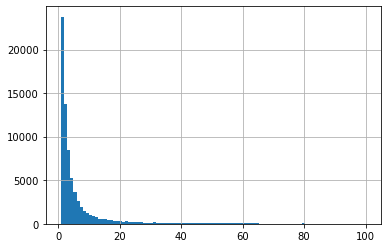

In [13]:
counts['BSJ-PP_Input1'].hist(bins = 100, range = (1,100))

<AxesSubplot: >

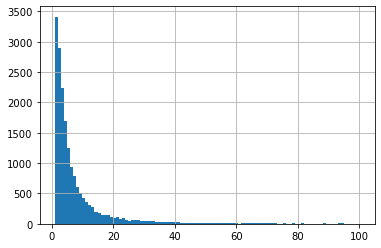

In [14]:
counts['BSJ-PP_Monosome1'].hist(bins = 100, range = (1,100))

In [15]:
counts

,seqname,source,feature,start,end,strand,frame,circ_id,circ_type,gene_id,...,BSJ-PP_Polysome1,BSJ-PP_Polysome2,BSJ-PP_Input2,BSJ-PP_Monosome1,FSJ-PP_Input1,FSJ-PP_Monosome2,FSJ-PP_Polysome1,FSJ-PP_Polysome2,FSJ-PP_Input2,FSJ-PP_Monosome1
0,chr1,CIRIquant,circRNA,746695.0,749381.0,-,.,chr1:746695|749381,intron,"ENSG00000228327.3,ENSG00000230021.10",...,0.0,0.0,24.0,0.0,4.0,0.0,0.0,0.0,42.0,0.0
1,chr1,CIRIquant,circRNA,805799.0,810170.0,-,.,chr1:805799|810170,exon,"ENSG00000230021.10,ENSG00000230092.7",...,0.0,9.0,34.0,11.0,8.0,0.0,0.0,3.0,16.0,1.0
2,chr1,CIRIquant,circRNA,915319.0,915949.0,+,.,chr1:915319|915949,intron,ENSG00000272438.1,...,0.0,0.0,1.0,0.0,51.0,0.0,0.0,0.0,43.0,0.0
3,chr1,CIRIquant,circRNA,955923.0,957273.0,-,.,chr1:955923|957273,exon,ENSG00000188976.11,...,0.0,0.0,2.0,0.0,222.0,15.0,0.0,0.0,220.0,0.0
4,chr1,CIRIquant,circRNA,1084353.0,1086012.0,-,.,chr1:1084353|1086012,exon,ENSG00000131591.17,...,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18287,chrX,CIRIquant,circRNA,150718625.0,150744453.0,+,.,chrX:150718625|150744453,exon,ENSG00000063601.17,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,68.0
18288,chrX,CIRIquant,circRNA,150718625.0,150755865.0,+,.,chrX:150718625|150755865,exon,ENSG00000063601.17,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,82.0
18295,chrX,CIRIquant,circRNA,152652593.0,152653608.0,+,.,chrX:152652593|152653608,exon,ENSG00000268089.3,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,314.0
18297,chrX,CIRIquant,circRNA,154769167.0,154776324.0,+,.,chrX:154769167|154776324,exon,"ENSG00000206693.1,ENSG00000130826.18",...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,80.0
